In [21]:
%autoreload 2
from data import *

  Fire Name  Year Fire_ID Fire_SegID  Database State  UTM_Zone        UTM_X  \
0  Buckweed  2007     bck   bck_1035  Training    CA        11  368133.5165   
1  Buckweed  2007     bck   bck_1090  Training    CA        11  367871.0165   
2  Buckweed  2007     bck   bck_1570  Training    CA        11  367503.5165   
3  Buckweed  2007     bck    bck_235  Training    CA        11  371108.5165   
4  Buckweed  2007     bck    bck_363  Training    CA        11  370763.5165   

         UTM_Y  Response  ... Peak_I15_mm/h  Peak_I30_mm/h Peak_I60_mm/h  \
0  3823231.989         0  ...           3.2            2.0           2.0   
1  3822984.489         0  ...           3.2            2.0           2.0   
2  3821741.989         0  ...           3.2            2.0           2.0   
3  3824991.989         0  ...           1.6            1.2           0.8   
4  3824576.989         0  ...           1.6            1.2           0.8   

  ContributingArea_km2  PropHM23  dNBR/1000        KF  Acc015_mm  Ac

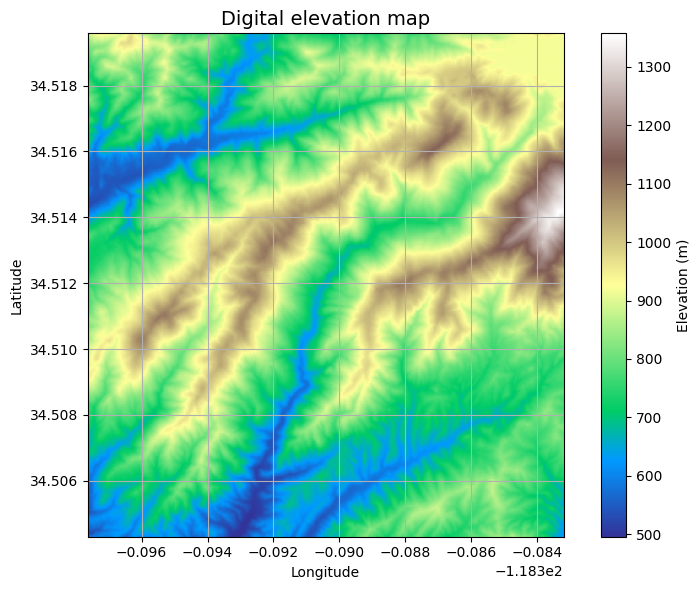

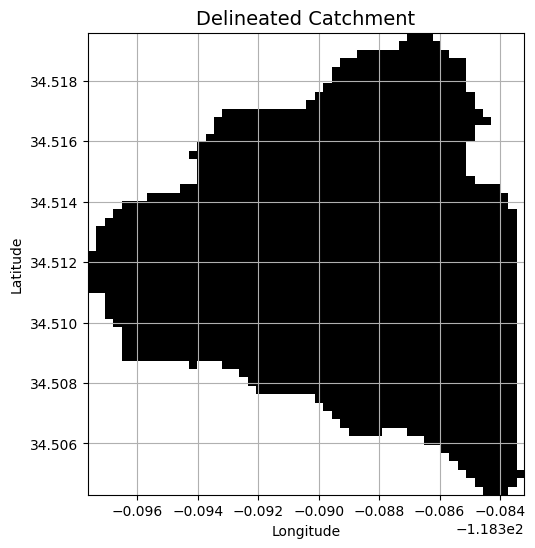

In [ ]:
data_path = 'data/ofr20161106_appx-1.xlsx'

df = pd.read_excel(data_path, sheet_name='Appendix1_ModelData')
print(df.head())

x = df['UTM_X'].astype(float)
y = df['UTM_Y'].astype(float)
zone = df['UTM_Zone'].astype(int)

print(f"x: {x[0]}, y: {y[0]}, zone: {zone[0]}")
bounds, suggested_buffer = utm_to_geographic_bounds(x[0], y[0], zone[0], 'north', 5, 'fire')

output_file = '/home/quinn/pwfdf/data/dem.tif'
elevation.clip(bounds=bounds, output=output_file, product='SRTM1')

delineate_watershed(output_file, (bounds[0], bounds[1]))